In [1]:
import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

import string
import warnings
import missingno
warnings.filterwarnings('ignore')


import pandas as pd
import cufflinks as cf
import chart_studio.plotly as py
import plotly.graph_objects as go
import numpy as np
import pandas as pd
import numpy as np
from numpy.random import gamma
from numpy.random import multivariate_normal
from scipy.stats import multivariate_t
from scipy.stats import f
import matplotlib.pyplot as plt



cf.go_offline(connected = True)


import pandas as pd
import cufflinks as cf
import chart_studio.plotly as py
import plotly.graph_objects as go
import numpy as np
import pandas as pd
import numpy as np
from numpy.random import gamma
from numpy.random import multivariate_normal
from scipy.stats import multivariate_t
from scipy.stats import f
import matplotlib.pyplot as plt
import missingno


cf.go_offline(connected = True)


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import make_scorer
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

import numpy as np
import pandas as pd
from sklearn.metrics import make_scorer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor 
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
import string
import warnings
import missingno

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
def make_time_series_3(row):

    i = str(row['공고게시일자'])
    year = i[0:4]
    month = i[4:6]
    date =  i[6:8]

    row['공고게시일자'] = pd.to_datetime(year+month+date,format='%Y%m%d')

    return row

In [4]:
df = pd.read_csv('용역_입찰공고_내역_2020.csv',encoding ='utf-8',error_bad_lines= False)
df = pd.concat([df,pd.read_csv('용역_입찰공고_내역_2019.csv',encoding ='utf-8',error_bad_lines= False)])
df = pd.concat([df,pd.read_csv('용역_입찰공고_내역_2018.csv',encoding ='utf-8',error_bad_lines= False)])
df_용역_입찰공고_내역 = pd.concat([df,pd.read_csv('용역_입찰공고_내역_2017.csv',encoding ='utf-8',error_bad_lines= False)])   

df_용역_입찰공고_내역_2 = df_용역_입찰공고_내역[['등록유형','공고게시일자'
,'조달구분',
'입찰공고차수',
'수요기관명',
'수요기관코드',
'긴급공고여부',
'정정공고여부',
'취소공고여부',
'추정가격',                                 
'배정예산',
'입찰방식',
'재입찰허용여부',
'낙찰자결정방법',
'입찰계약방법',
'예가방법',                                 
'업종제한내용',
'지역제한내용',
 ]].copy()

df_용역_입찰공고_내역_2 = df_용역_입찰공고_내역_2.apply(make_time_series_3,axis=1)


In [5]:
df_용역_입찰공고_내역_2

,등록유형,공고게시일자,조달구분,입찰공고차수,수요기관명,수요기관코드,긴급공고여부,정정공고여부,취소공고여부,추정가격,배정예산,입찰방식,재입찰허용여부,낙찰자결정방법,입찰계약방법,예가방법,업종제한내용,지역제한내용
0,나라장터(G2B),2020-03-31,자체조달,0,전라북도 정읍시,4690000,Y,N,N,87100000.0,95810000.0,전자입찰,Y,추정가격 1억미만(PQ비대상),제한경쟁,복수예가,NaN,전라북도[45000]
1,나라장터(G2B),2020-03-31,자체조달,0,울산광역시 북구,3720000,N,N,N,42171818.0,46389000.0,전자입찰,Y,제한최저,수의(총액)소액수의,복수예가,[학술.연구용역(1169)],"부산광역시[26000], 울산광역시[31000], 경상남도[48000]"
2,나라장터(G2B),2020-03-31,자체조달,0,서울특별시,6110000,N,N,N,50000000.0,55000000.0,전자입찰,N,제한최저,수의(총액)소액수의,복수예가,NaN,서울특별시[11000]
3,나라장터(G2B),2020-03-31,자체조달,1,충청북도교육청 충청북도제천교육지원청,8031000,Y,N,Y,62630000.0,68893000.0,전자입찰,Y,추정가격 1억미만(PQ비대상),제한경쟁,복수예가,[안전진단전문기관(건축)(1397)]업종 또는[안전진단전문기관(종합)(4963)],충청북도[43000]
4,나라장터(G2B),2020-03-31,자체조달,0,충청북도교육청 충청북도제천교육지원청,8031000,Y,N,N,70980000.0,78078000.0,전자입찰,Y,추정가격 1억미만(PQ비대상),제한경쟁,복수예가,[안전진단전문기관(건축)(1397)]업종 또는[안전진단전문기관(종합)(4963)],충청북도[43000]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144420,나라장터(G2B),2017-10-02,자체조달,0,사단법인 대한당구연맹,Z031193,N,N,N,170000000.0,NaN,직찰/우편/상시,N,협상에 의한 낙찰제,제한(총액)협상에의한계약,비예가,NaN,NaN
144421,나라장터(G2B),2017-10-01,자체조달,0,경기도 김포시,4090000,N,N,N,100045454.0,110050000.0,전자입찰,Y,제한최저,일반(총액),복수예가,NaN,NaN
144422,나라장터(G2B),2018-01-01,자체조달,0,경상남도 진주시,5310000,N,N,N,380727272.0,418800000.0,전자입찰,N,협상에 의한 낙찰제,일반(총액)협상에의한계약,비예가,NaN,NaN
144423,나라장터(G2B),2018-01-01,자체조달,0,서울특별시,6110000,N,N,N,50914545.0,56006000.0,전자입찰,N,협상에 의한 낙찰제,일반(총액)협상에의한계약,비예가,NaN,NaN


## 이때까지는 주 별, 월 별로 공고의 가격을 합쳐서 하였다면, 이제는 따로따로 보기로 하였다. 이때 각각의 observation이 (MR 차트)

In [7]:
df_용역_입찰공고_내역_2['배정예산'].isnull().sum()

15404

In [69]:
df_용역_입찰공고_내역_3 = df_용역_입찰공고_내역_2.dropna(subset = ['배정예산']).copy()

In [416]:

df_용역_입찰공고_내역_3 = df_용역_입찰공고_내역_3[df_용역_입찰공고_내역_3['수요기관코드'] == '6110000']


In [417]:
df_mr = df_용역_입찰공고_내역_3.reset_index()[['배정예산']].copy()

In [418]:
df_mr.head()

,배정예산
0,55000000.0
1,80000000.0
2,194955000.0
3,280651000.0
4,100000000.0


In [419]:
import math


In [420]:
def moving(data):
    for i in range(data.shape[0]):
        if i == 0:
            data.loc[i,'moving_average'] = data.loc[i,'배정예산']
        else:
            data.loc[i,'moving_average'] = abs(data.loc[i,'배정예산']- data.loc[i-1,'배정예산'])
    return data

In [421]:
df_mr = moving(df_mr)

In [422]:
df_mr.apply(np.mean,axis=0)['배정예산'] , df_mr.apply(np.mean,axis=0)['moving_average']

(312529081.9468376, 352801162.96902466)

In [423]:
df_mr.loc[45,'배정예산']

1350000000.0

In [424]:
mr_bar = np.mean(df_mr['moving_average'])
x_bar = np.mean(df_mr['배정예산'])

In [425]:
def moving_control_chart(x_bar,mr_bar):
    D4 = 3.267
    mr_ucl = D4 * mr_bar
    mr_lcl = 0
    x_ucl = x_bar + 3 * mr_bar / 1.128
    x_lcl = x_bar - 3 * mr_bar / 1.128
    
    return mr_ucl,mr_lcl,x_ucl,x_lcl



In [426]:
def index_mr(data):
    mr_ucl,mr_lcl,x_ucl,x_lcl = moving_control_chart(data.apply(np.mean,axis=0)['배정예산'] , data.apply(np.mean,axis=0)['moving_average'])
    mr_ucl,mr_lcl,x_ucl,x_lcl
    lst_idx = []
    for i in data.index:
        if (data.loc[i,'moving_average'] > mr_ucl):
            pass
        else:
            lst_idx.append(i)
            
    return lst_idx,mr_ucl,mr_lcl,x_ucl,x_lcl



In [427]:
def index_x(data):
    mr_ucl,mr_lcl,x_ucl,x_lcl = moving_control_chart(data.apply(np.mean,axis=0)['배정예산'] , data.apply(np.mean,axis=0)['moving_average'])

    lst_idx = []
    for i in data.index:
        if (data.loc[i,'배정예산'] > x_ucl) | (data.loc[i,'배정예산'] < x_lcl):
            pass
        else:
            lst_idx.append(i)

    return lst_idx,mr_ucl,mr_lcl,x_ucl,x_lcl

In [428]:
def index_final(data,lst_index):
    return data.loc[lst_index]
    

In [429]:
def total(data):
    lst_all,mr_ucl,mr_lcl,x_ucl,x_lcl = index_mr(data)
    data_2 = index_final(data,lst_all)
    lst_all_2,mr_ucl,mr_lcl,x_ucl,x_lcl = index_x(data_2)
    
    return index_final(data_2,lst_all_2),mr_ucl,mr_lcl,x_ucl,x_lcl
    
    

In [430]:

from tqdm import notebook
import time 
lst_x_lcl = []
lst_x_ucl = []
lst_mr_lcl = []
lst_mr_ucl = []
num = 0
for i in notebook.tqdm(range(100), desc='iterate range 100'):
    df, mr_ucl,mr_lcl,x_ucl,x_lcl = total(df_mr)
    df_mr = df
    if df_mr.equals(total(df_mr)[0]):
        df, mr_ucl,mr_lcl,x_ucl,x_lcl = total(df_mr)
        print(num)
        lst_mr_lcl.append(mr_lcl)
        lst_mr_ucl.append(mr_ucl)
        lst_x_ucl.append(x_ucl)
        lst_x_lcl.append(x_lcl)
        break
    num += 1

23



In [431]:
df_mr

,배정예산,moving_average
0,55000000.0,55000000.0
1,80000000.0,25000000.0
2,194955000.0,114955000.0
3,280651000.0,85696000.0
4,100000000.0,180651000.0
...,...,...
6935,71234000.0,35792000.0
6936,339185000.0,267951000.0
6937,48631000.0,290554000.0
6938,114141820.0,65510820.0


In [432]:
print(lst_x_ucl,lst_x_lcl)

[435584401.2599636] [-129718749.06185812]


In [433]:
df_mr['x_ucl'] = lst_x_ucl[0]
df_mr['x_lcl'] = lst_x_lcl[0]
df_mr['mr_lcl'] = lst_mr_lcl[0]
df_mr['mr_ucl'] = lst_mr_ucl[0]

In [434]:
mr_bar = np.mean(df_mr['moving_average'])
x_bar = np.mean(df_mr['배정예산'])

In [456]:
fig = go.Figure()

fig.add_hline(y = mr_bar,name= 'Mean',line_color="purple")

fig.add_trace(go.Scatter(x = df_mr.index ,y = df_mr['moving_average'] ,mode= 'markers',name= 'Monitoring Statistics',marker_color = 'gray'))

fig.add_trace(go.Scatter(x = df_mr.index ,y = df_mr['mr_lcl']  ,mode= 'lines',name= 'LCL'))

fig.add_trace(go.Scatter(x = df_mr.index ,y = df_mr['mr_ucl'] ,mode= 'lines',name= 'UCL'))




fig.update_layout(width=1000, height=600,             
                 xaxis_range=[0,50],
                  title = 'MR_chart_phase_1_completed')


# fig.write_html('MR_chart_phase_1_completed.html')

fig.show()

In [383]:
df_mr

,배정예산,moving_average,x_ucl,x_lcl,mr_lcl,mr_ucl
0,55000000.0,55000000.0,4.355844e+08,-1.297187e+08,0,3.472069e+08
1,80000000.0,25000000.0,4.355844e+08,-1.297187e+08,0,3.472069e+08
2,194955000.0,114955000.0,4.355844e+08,-1.297187e+08,0,3.472069e+08
3,280651000.0,85696000.0,4.355844e+08,-1.297187e+08,0,3.472069e+08
4,100000000.0,180651000.0,4.355844e+08,-1.297187e+08,0,3.472069e+08
...,...,...,...,...,...,...
6935,71234000.0,35792000.0,4.355844e+08,-1.297187e+08,0,3.472069e+08
6936,339185000.0,267951000.0,4.355844e+08,-1.297187e+08,0,3.472069e+08
6937,48631000.0,290554000.0,4.355844e+08,-1.297187e+08,0,3.472069e+08
6938,114141820.0,65510820.0,4.355844e+08,-1.297187e+08,0,3.472069e+08


In [457]:
fig = go.Figure()

fig.add_trace(go.Scatter(x = df_mr.index ,y = pd.Series(x_bar),line_shape='hv',name= 'Mean'))

fig.add_trace(go.Scatter(x = df_mr.index ,y = df_mr['배정예산'] ,mode= 'markers',name= 'Monitoring Statistics',marker_color = 'gray'))

fig.add_trace(go.Scatter(x = df_mr.index ,y = df_mr['x_lcl']  ,mode= 'lines',name= 'LCL'))

fig.add_trace(go.Scatter(x = df_mr.index ,y = df_mr['x_ucl'] ,mode= 'lines',name= 'UCL'))




fig.update_layout(width=1000, height=600,             
                 xaxis_range=[0,50],
                  title = 'X_chart_phase_1_completed')


# fig.write_html('X_chart_phase_1_completed.html')

fig.show()

## 보는 과정은, MR Chart를 그려서 (Phase I)을 진행한다. 이때 MR 관리도에서 UCL / LCL 밖에 있는 점을 보고 X_bar chart로부터 평균이 관리한계선 안에 있는지 확인이 가능하고, MR 관리도에서는 그 평균에 대해서 변동이 우연변동인지 원인변동인지 확인이 가능하다. 우선 MR chart를 그리고, 이상치 제거, 그 다음 X_bar Chart 그려서 이상치 제거하여 Phase I 마치고, Phase II에서 판단한다. ->> 23번 반복시켜 UCL, LCL MR / X_bar chart를 그렸다.  2021년은 Phase II를 진행하였으며, 대략 70% 의 데이터가 In-control 상태에 있는 것을 확인하였다. out-of-control 상태인 데이터를 감지하도록 만들면 될 것 같다.

In [355]:
df_test = pd.read_csv('용역_입찰공고_내역_2021.csv')

In [356]:
df_test.columns

Index(['등록유형', '용역구분', '조달구분', '공고시스템명', '입찰공고번호', '입찰공고차수', '공고게시일자', '공고명',
       '공고기관명', '실수요기관명', '수요기관명', '수요기관코드', '수요기관구분', '수요기관지역명', '품명내용',
       '세부품명내용', '합계수량', '합계금액', '납품기한', '긴급공고여부', '정정공고여부', '취소공고여부', '추정가격',
       '배정예산', '입찰참가자격등록마감일자', '입찰서개시일자', '입찰서마감일자', '개찰일자', '입찰방식', '재입찰허용여부',
       '입찰계약방법', '낙찰자결정방법', '낙찰하한율', '예가방법', '업종제한여부', '업종제한내용', '지역제한내용',
       '공동도급구성방식명', '공동도급협정서접수방식', '공동도급협정서접수마감일자', '국제입찰여부', '국제입찰사유',
       '낙찰자결정적용법규', '조항호코드', '조항호명', '정보화사업여부', '기술평가대행여부', 'SW분리발주대상구분',
       'SW분리발주적용구분', '참조번호', '이전입찰공고번호', '사전규격등록번호', '조달요청번호', '발주계획통합번호',
       '규격검토일자', '실적심사신청서', '실적심사신청서신청기한'],
      dtype='object')

In [358]:
df_test_2 = df_test[['등록유형','공고게시일자'
,'조달구분',
'입찰공고차수',
'수요기관명',
'수요기관코드',
'긴급공고여부',
'정정공고여부',
'취소공고여부',
'추정가격',                                 
'배정예산',
'입찰방식',
'재입찰허용여부',
'낙찰자결정방법',
'입찰계약방법',
'예가방법',                                 
'업종제한내용',
'지역제한내용',
 ]].copy()

df_test_2 = df_test.apply(make_time_series_3,axis=1)

In [385]:
df_test_3 = df_test_2.dropna(subset = ['배정예산']).copy()
df_test_3 = df_test_3[df_test_3['수요기관코드'] == '6110000']
df_mr_test = df_test_3.reset_index()[['배정예산']].copy()
df_mr_test = moving(df_mr_test)

In [453]:
fig = go.Figure()

fig.add_trace(go.Scatter(x = df_mr_test.index ,y = pd.Series(mr_bar),line_shape='hv',name= 'Mean'))

fig.add_trace(go.Scatter(x = df_mr_test.index ,y = df_mr_test['moving_average'] ,mode= 'markers',name= 'Monitoring Statistics',marker_color = 'gray'))

fig.add_trace(go.Scatter(x = df_mr_test.index ,y = df_mr['mr_lcl']  ,mode= 'lines',name= 'LCL'))

fig.add_trace(go.Scatter(x = df_mr_test.index ,y = df_mr['mr_ucl'] ,mode= 'lines',name= 'UCL'))




fig.update_layout(width=1000, height=600,             
                 xaxis_range=[0,50],
                  title = 'MR_chart_phase_2_MR_chart')


# fig.write_html('MR_chart_phase_2_MR_chart.html')

fig.show()

In [461]:
df_mr_test['moving_average'].iplot(kind ='hist')

In [454]:
fig = go.Figure()

fig.add_trace(go.Scatter(x = df_mr_test.index ,y = pd.Series(x_bar),line_shape='hv',name= 'Mean'))

fig.add_trace(go.Scatter(x = df_mr_test.index ,y = df_mr_test['배정예산'] ,mode= 'markers',name= 'Monitoring Statistics',marker_color = 'gray'))

fig.add_trace(go.Scatter(x = df_mr_test.index ,y = df_mr['x_lcl']  ,mode= 'lines',name= 'LCL'))

fig.add_trace(go.Scatter(x = df_mr_test.index ,y = df_mr['x_ucl'] ,mode= 'lines',name= 'UCL'))




fig.update_layout(width=1000, height=600,             
                 xaxis_range=[0,50],
                  title = 'MR_chart_phase_2_Xbar_chart')


# fig.write_html('MR_chart_phase_2_Xbar_chart.html')

fig.show()

In [393]:

df_mr_test['x_ucl'] = lst_x_ucl[0]
df_mr_test['x_lcl'] = lst_x_lcl[0]
df_mr_test['mr_lcl'] = lst_mr_lcl[0]
df_mr_test['mr_ucl'] = lst_mr_ucl[0]

In [397]:
df_mr_test

num = 0
for i in range(df_mr_test.shape[0]):
    if (df_mr_test.loc[i,'배정예산'] < df_mr_test.loc[i,'x_ucl']) & (df_mr_test.loc[i,'배정예산'] > df_mr_test.loc[i,'x_lcl']):
        num +=1 
    else:
        pass



In [399]:
num / df_mr_test.shape[0] * 100

79.0449037776194

In [400]:
df_mr_test.head()

,배정예산,moving_average,x_ucl,x_lcl,mr_lcl,mr_ucl
0,70000000.0,70000000.0,4.355844e+08,-1.297187e+08,0,3.472069e+08
1,385077000.0,315077000.0,4.355844e+08,-1.297187e+08,0,3.472069e+08
2,98480000.0,286597000.0,4.355844e+08,-1.297187e+08,0,3.472069e+08
3,36378000.0,62102000.0,4.355844e+08,-1.297187e+08,0,3.472069e+08
4,276900000.0,240522000.0,4.355844e+08,-1.297187e+08,0,3.472069e+08


In [463]:
df_mr_test

num = 0
for i in range(df_mr_test.shape[0]):
    if (df_mr_test.loc[i,'moving_average'] < df_mr_test.loc[i,'mr_ucl']) & (df_mr_test.loc[i,'moving_average'] > df_mr_test.loc[i,'x_lcl']):
        num +=1 
    else:
        pass


## 관리도의 성능 측정이 필요하다...!!! 직접 관리상한선을 넘어가는 것을ㅇ

In [466]:
be_1 = (num / df_mr_test.shape[0])

ARL_0_for_X_bar = 1 / be_1
print(be_1,ARL_0_for_X_bar)

0.6913756236635781 1.4463917525773196


In [469]:
import scipy
print('ARL_1 = ', 1/(1-be_1)) # 정규분포를 따라야 맞는 값이다.

ARL_1 =  3.240184757505774


In [480]:
rand2 = df_mr['moving_average']

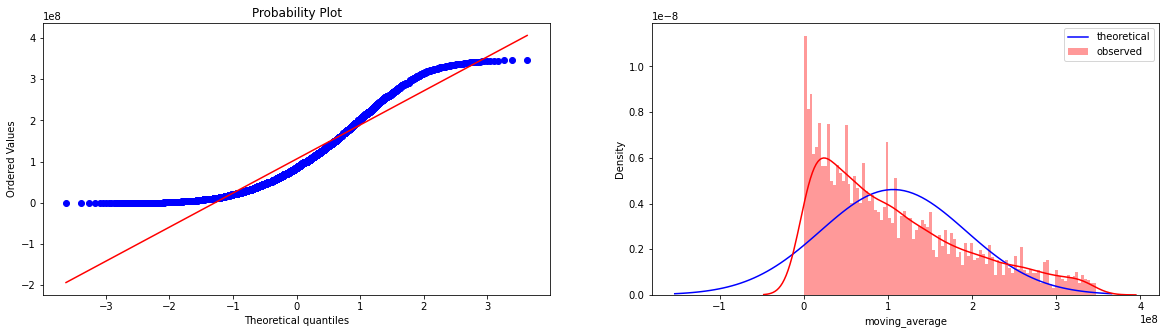

In [481]:
import scipy.stats as stats

fig = plt.figure(figsize=(20,5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

stats.probplot(rand2, dist=stats.norm, plot=ax1)
mu = rand2.mean()
variance = rand2.var()
sigma = variance ** 0.5
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
ax2.plot(x, stats.norm.pdf(x, mu, sigma), color="blue", label='theoretical')

sns.distplot(ax=ax2, a=rand2, bins=100, color="red", label='observed')
ax2.legend()

plt.show()

In [482]:
from scipy.stats import shapiro

shapiro(rand2)

ShapiroResult(statistic=0.9158374071121216, pvalue=1.401298464324817e-45)

#### p_value 값이 0.05 보다 훨씬 작으므로, 대립가설(정규분포를 따르지 않는다)를 채택한다.

In [ ]:
import plotly.figure_factory as ff
import numpy as np
import pandas as pd

df = pd.DataFrame({'2012': np.random.randn(200),
                   '2013': np.random.randn(200)+1})
fig = ff.create_distplot([df[c] for c in df.columns], df.columns, bin_size=.25)
fig.show()d

In [503]:
df_mr.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    8,    9,   11,
            ...
            6924, 6925, 6926, 6929, 6934, 6935, 6936, 6937, 6938, 6939],
           dtype='int64', length=4856)

In [504]:
test_lst = [i for i in range(6940)]
test_lst_2 = []

In [535]:
w_0 = df_mr.index.tolist()

In [544]:
w_1 = [k for k in range(6940)]
print(type(w_1))

<class 'list'>


In [548]:
k = [i for i in range(6940) if i not in w_0]

In [507]:
test_lst_2

[]

In [552]:
# df_용역_입찰공고_내역_3.reset_index().iloc[k].to_excel('outlier.xlsx')

In [558]:
df_test = df_용역_입찰공고_내역[df_용역_입찰공고_내역['수요기관코드'] == '6110000']

In [561]:
# df_test.reset_index().iloc[k].to_excel('outlier.xlsx')